# Run 2.1i BF Kernels

In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import sys

In [2]:
import lsst.cp.pipe

In [76]:
14541924 - 15746000

-1204076

In [59]:
kernels_2 = '/global/cscratch1/sd/descdm/tomTest/bfKernels.2/'

In [31]:
rafts = ['R01','R02','R03','R10','R11','R12','R13','R14','R20','R21','R22','R23','R24','R30','R31','R32','R33','R34','R41','R42','R43']

In [49]:
path = '/global/cscratch1/sd/elp25/bf_run21i_tests/bf_kernels/'

In [51]:
def load_kernels(path):
    files = glob.glob(path+'*.pkl')
    kernel_dic = {}
    for raft in rafts:
        kernel_dic[raft] = {}
    for raft in rafts: 
        sensor_files = glob.glob(path+'*'+raft+'*.pkl')
        for file in sensor_files:
            sensor = file[len(path)+13:len(path)+16]
            kernel_dic[raft][sensor] = pd.read_pickle(glob.glob(path+'*'+raft+'*'+sensor+'*.pkl')[0])
    return kernel_dic

In [52]:
kernel_data = load_kernels(path)

In [60]:
kernel_data2 = load_kernels(kernels_2)

In [53]:
test_kernel = kernel_data['R01']['S00'].kernel[0]

In [64]:
test_kernel2 = kernel_data2['R01']['S00'].kernel['C14']

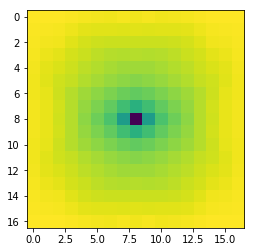

In [65]:
plt.imshow(test_kernel)

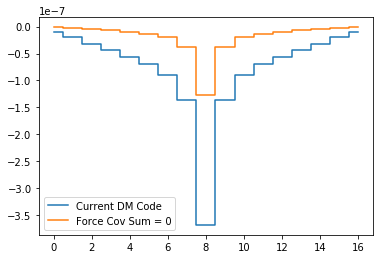

In [72]:
plt.plot(test_kernel[:,8], drawstyle='steps-mid',label='Current DM Code')
plt.plot(test_kernel2[:,8], drawstyle='steps-mid',label='Force Cov Sum = 0')
plt.legend(loc='best')

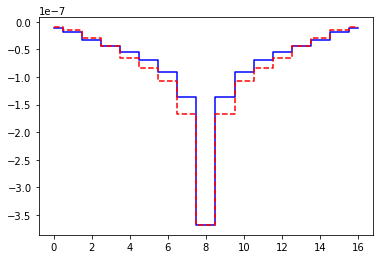

In [11]:
plt.plot(test_kernel[:,8], color='blue', drawstyle='steps-mid')
plt.plot(test_kernel[8,:], linestyle='--', color='red', drawstyle='steps-mid')

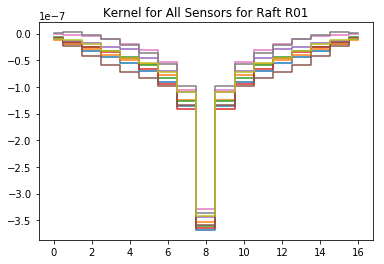

In [12]:
sensors = ['S00', 'S10', 'S20', 'S02', 'S22', 'S21', 'S12', 'S01', 'S11']
R01_kernels = []
for i in range(9):
    R01_kernels.append(kernel_data['R01'][sensors[i]].kernel)


kernels = []
for sensor in R01_kernels:
    for i in range(9):
        try: 
            kernel = sensor[i]
            kernels.append(kernel)
        except:
            pass

for kernel in kernels:
    plt.plot(kernel[:,8],drawstyle='steps-mid')
    plt.title('Kernel for All Sensors for Raft R01')

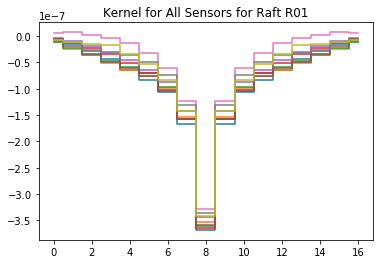

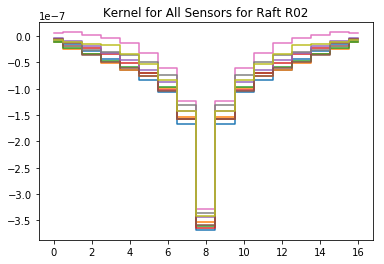

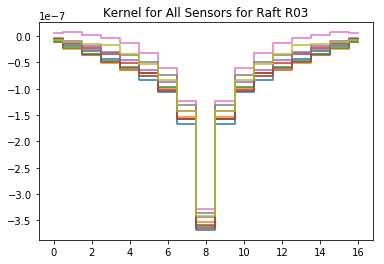

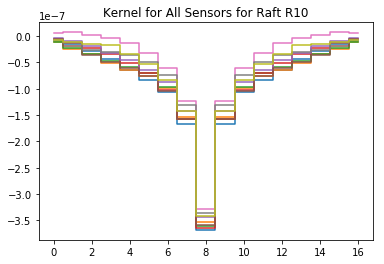

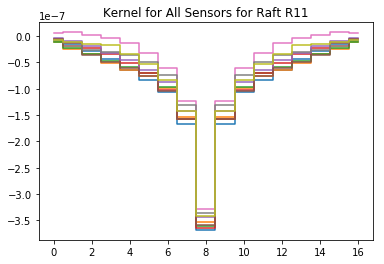

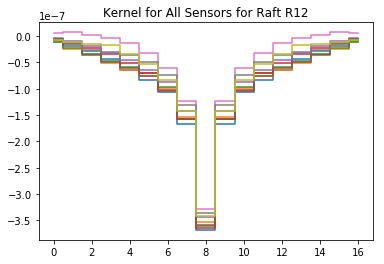

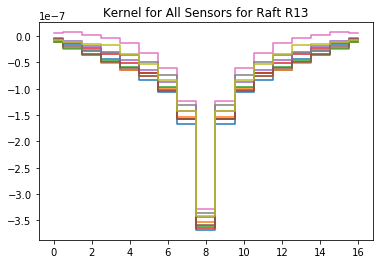

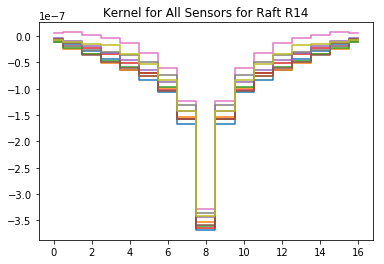

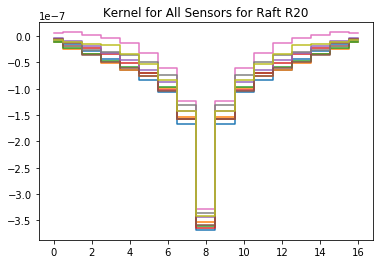

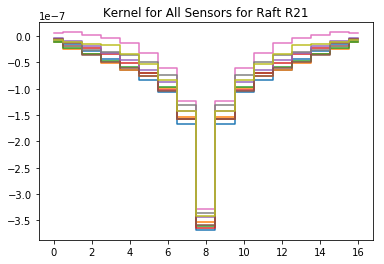

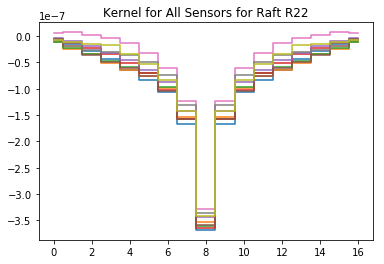

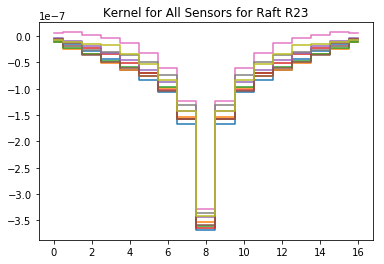

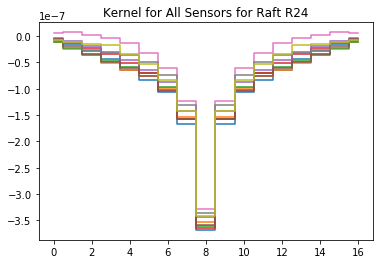

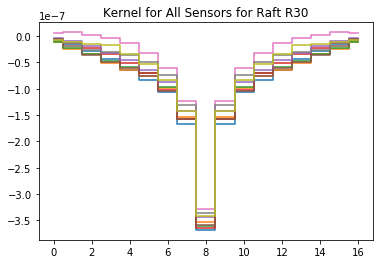

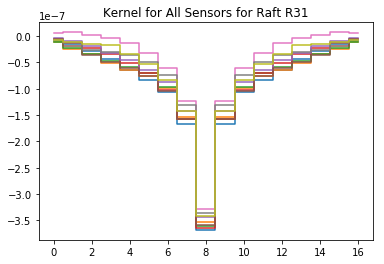

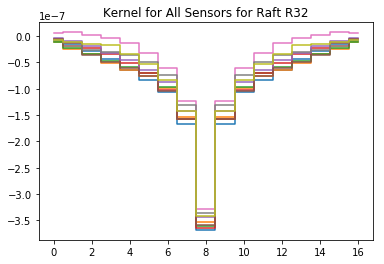

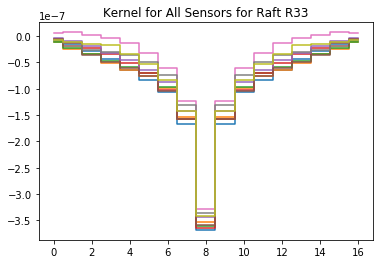

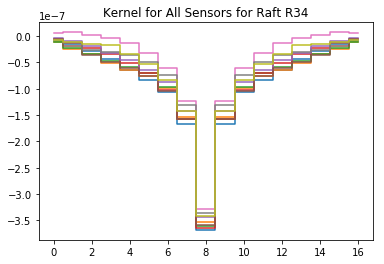

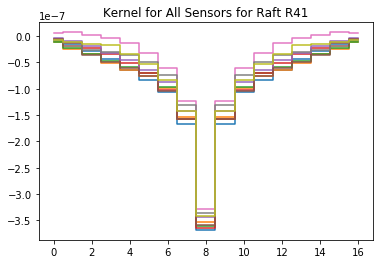

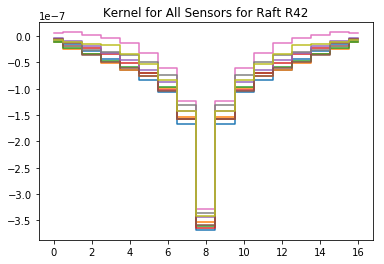

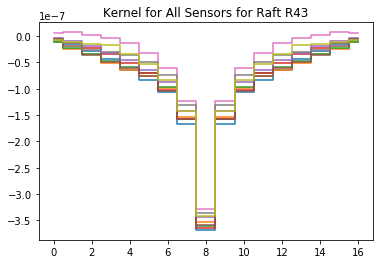

In [13]:
rafts = ['R01','R02','R03','R10','R11','R12','R13','R14','R20','R21','R22','R23','R24','R30','R31','R32','R33','R34','R41','R42','R43']
for raft in rafts:
    raft_kernels = []
    for i in range(9):
        raft_kernels.append(kernel_data[raft][sensors[i]].kernel)
    kernels = []
    for sensor in R01_kernels:
        for i in range(189):
            try: 
                kernel = sensor[i]
                kernels.append(kernel)
            except:
                pass

    for kernel in kernels:
        plt.plot(kernel[8,:],drawstyle='steps-mid')
        plt.title('Kernel for All Sensors for Raft '+raft)
    plt.show()

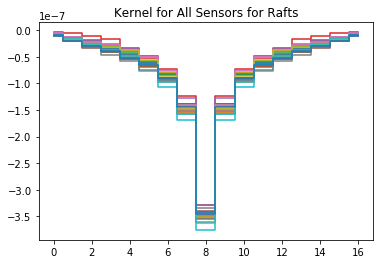

In [14]:
rafts = ['R01','R02','R03','R10','R11','R12','R13','R14','R20','R21','R22','R23','R24','R30','R31','R32','R33','R34','R41','R42','R43']
for raft in rafts:
    raft_kernels = []
    for i in range(9):
        raft_kernels.append(kernel_data[raft][sensors[i]].kernel)
    kernels = []
    for sensor in raft_kernels:
        for i in range(189):
            try: 
                kernel = sensor[i]
                kernels.append(kernel)
            except:
                pass

    raft_kernel = np.median(np.array(kernels),axis=0)
    plt.plot(raft_kernel[8,:],drawstyle='steps-mid',label=raft)
plt.title('Kernel for All Sensors for Rafts')
plt.show()